In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
color = sns.color_palette()


In [2]:
import pandas as pd
df = pd.read_csv('crypto-markets.csv', parse_dates=['date'])
df.head(10)

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32
5,bitcoin,BTC,Bitcoin,2013-05-03,1,106.25,108.13,79.10,97.75,0,1180070000,0.6424,29.03
6,bitcoin,BTC,Bitcoin,2013-05-04,1,98.10,115.00,92.50,112.50,0,1089890000,0.8889,22.50
7,bitcoin,BTC,Bitcoin,2013-05-05,1,112.90,118.80,107.14,115.91,0,1254760000,0.7521,11.66
8,bitcoin,BTC,Bitcoin,2013-05-06,1,115.98,124.66,106.64,112.30,0,1289470000,0.3141,18.02
9,bitcoin,BTC,Bitcoin,2013-05-07,1,112.25,113.44,97.70,111.50,0,1248470000,0.8767,15.74


In [3]:
cryptos = []
for _ in range(40):
    cryptos.append(df[df['ranknow']==_+1])

In [4]:
def date_to_close_relation(dfm):  #this function shows how closing price is correlated to date
    dfm['Date_num'] = dfm['date'].apply(lambda x: mdates.date2num(x))
    %matplotlib inline  
    fig, ax = plt.subplots(figsize=(5,3))
    sns.tsplot(dfm.close.values, time=dfm.Date_num.values, alpha=0.8, color=color[3], ax=ax)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    fig.autofmt_xdate()
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price in USD', fontsize=12)
    plt.title("Closing price distribution of " + dfm['slug'].iloc[0], fontsize=15)
    plt.show()

In [5]:
def date_to_OHLC_Price_relation(df2x):  #this function shows how price wrt OHLC is correlated to date
    from matplotlib.finance import candlestick_ohlc
    #df2x = dfm[dfm['ranknow']==1]
    #type(df2x['market'].iloc[0])
    fig = plt.figure(figsize=(6,4))
    ax1 = plt.subplot2grid((1,1), (0,0))
    df2x['Date_mpl'] = df2x['date'].apply(lambda x: mdates.date2num(x)) 
    df2x[['open']] = df2x[['open']].apply(pd.to_numeric)
    df2x[['high']] = df2x[['high']].apply(pd.to_numeric)
    df2x[['low']] = df2x[['low']].apply(pd.to_numeric)
    df2x[['close']] = df2x[['close']].apply(pd.to_numeric)
    df2x[['volume']] = df2x[['volume']].apply(pd.to_numeric)
    df2x = df2x[df2x['date']>'2017-08-01']
    ohlc = []
    for ind, row in df2x.iterrows():
        ol = [row['Date_mpl'],row['open'], row['high'], row['low'], row['close'],row['volume']]
        ohlc.append(ol)
    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    #ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    plt.xlabel("Date", fontsize=12)
    plt.xticks(rotation='vertical')
    plt.ylabel("Price in USD", fontsize=12 )
    title_str = "Candlestick chart for " 
    plt.title(title_str + df2x['slug'].iloc[0], fontsize=15)
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()

In [6]:
def date_to_MarketCap_relation(df1x): #this function shows how Market Capitalization is correlated to date
    t=df1x['slug'].iloc[0]
    df1x = df1x[['date','market']]
    df_ts = df1x.set_index('date')
    df_ts[['market']] = df_ts[['market']].apply(pd.to_numeric)
    df_ts.sort_index(inplace=True)
    plt.plot(df_ts)
    plt.ylabel('Market Cap')
    plt.xlabel('Date')
    plt.title(t)
    plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


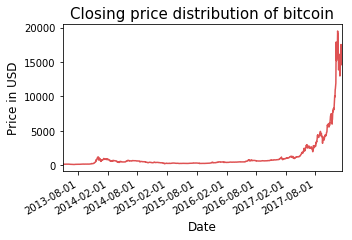

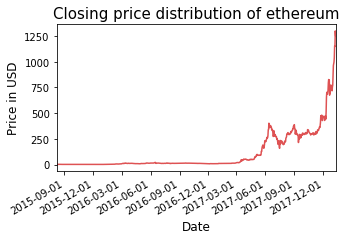

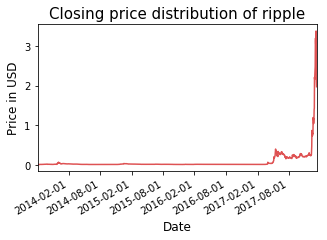

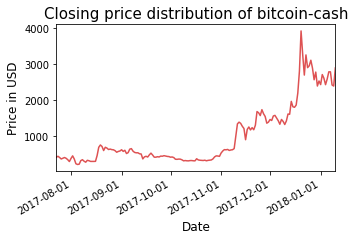

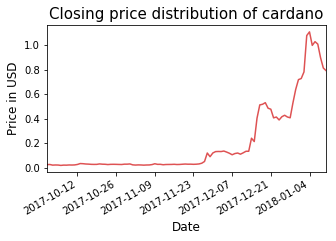

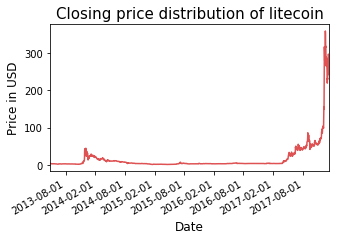

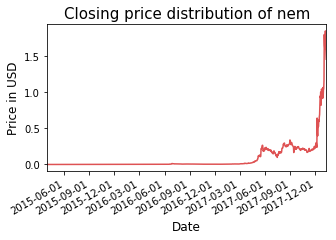

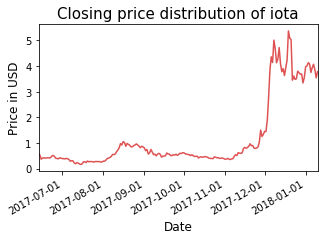

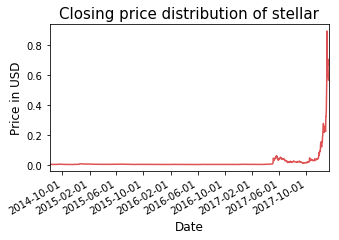

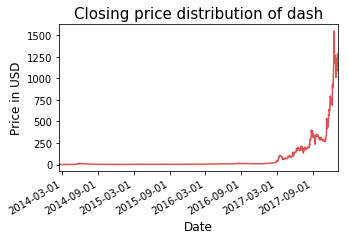

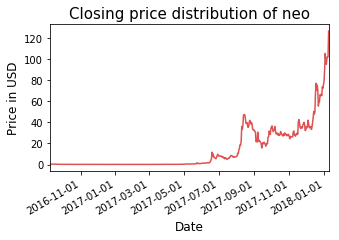

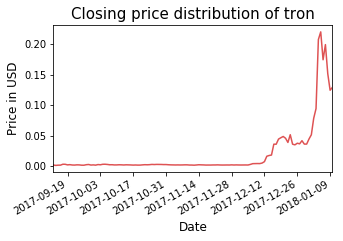

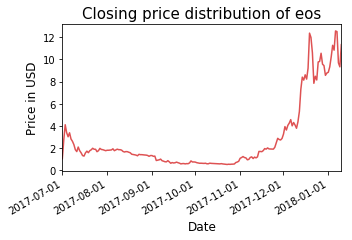

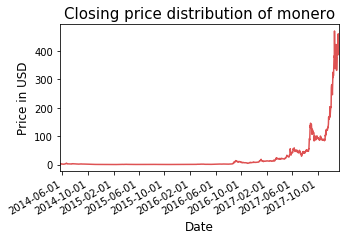

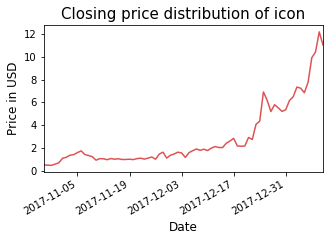

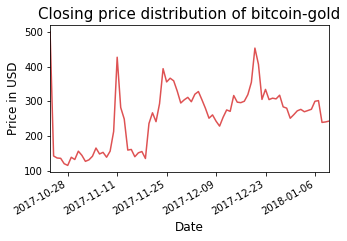

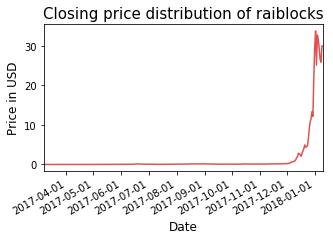

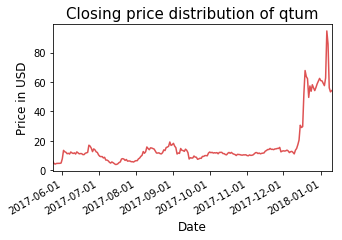

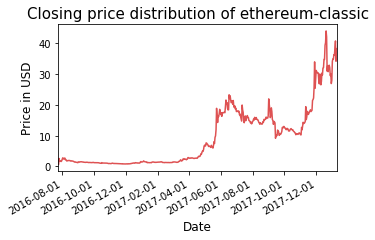

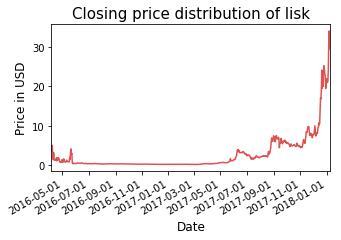

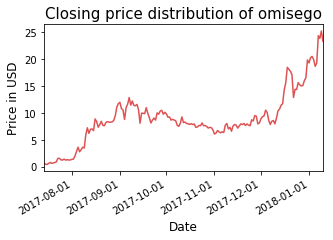

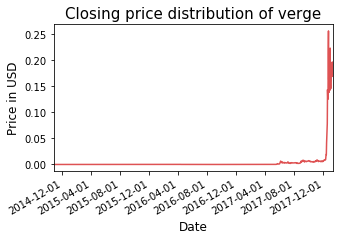

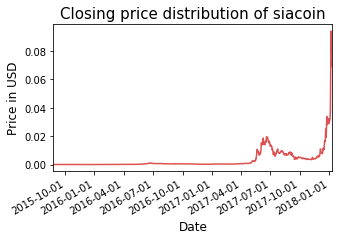

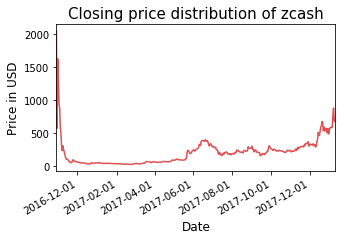

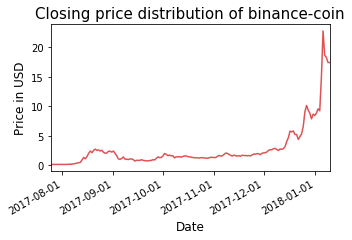

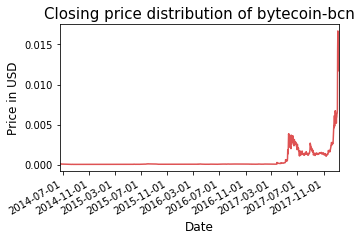

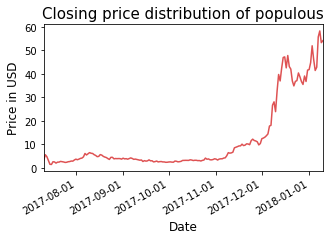

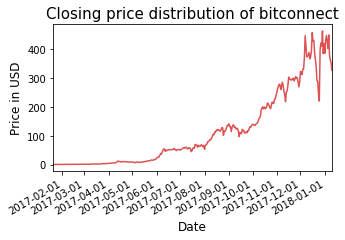

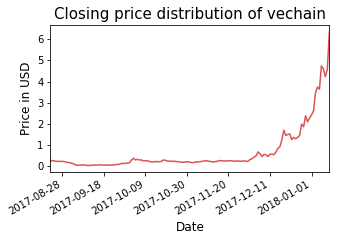

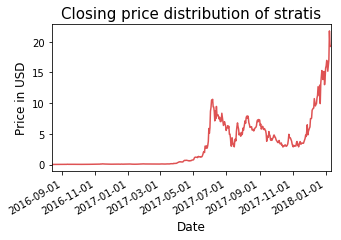

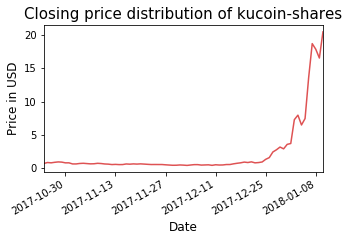

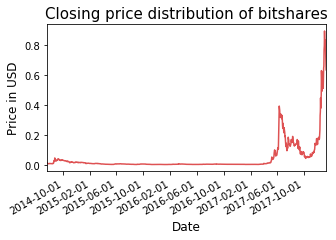

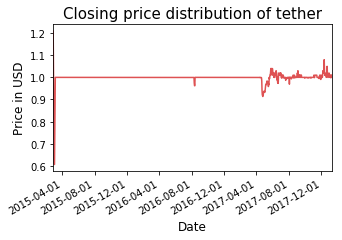

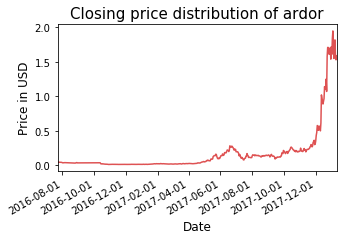

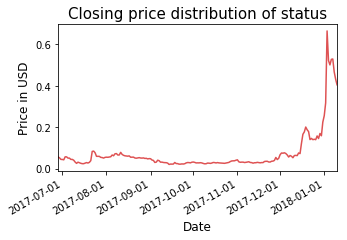

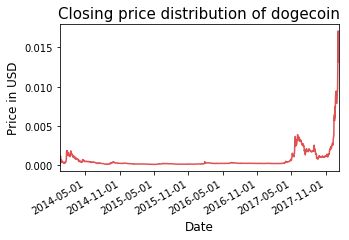

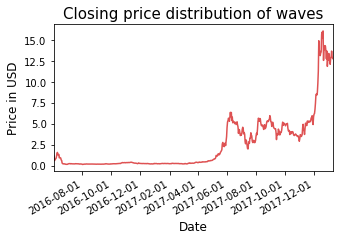

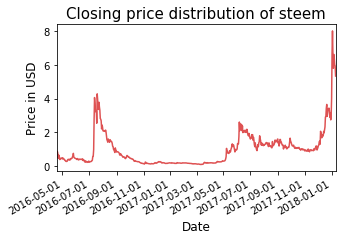

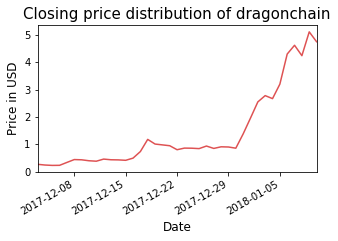

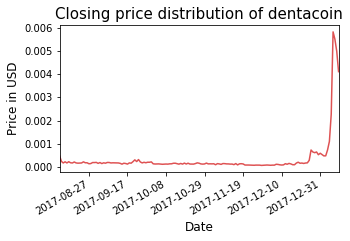

In [7]:
#Now lets look at all the graphs of date to close relation for all the crypto-currencies

for crypt in cryptos:
    date_to_close_relation(crypt)

/home/waheguru/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value

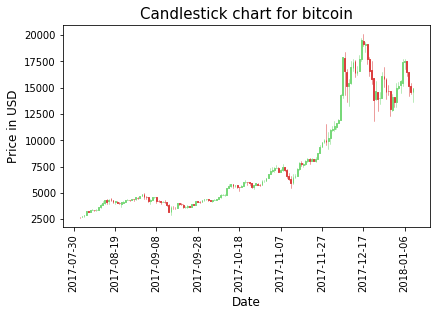

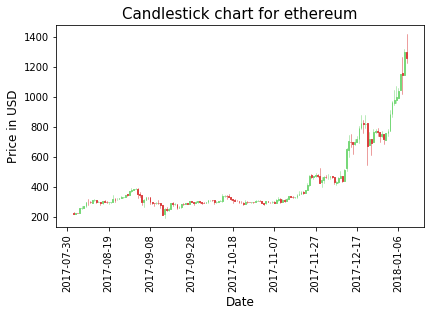

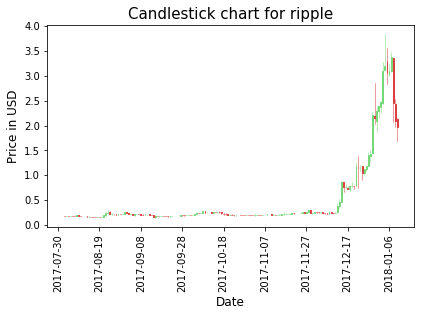

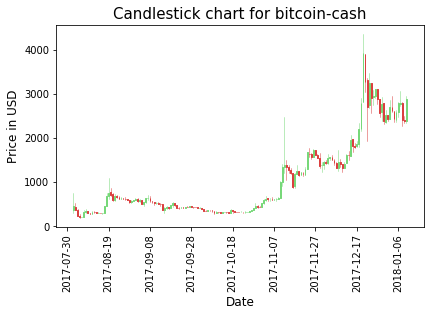

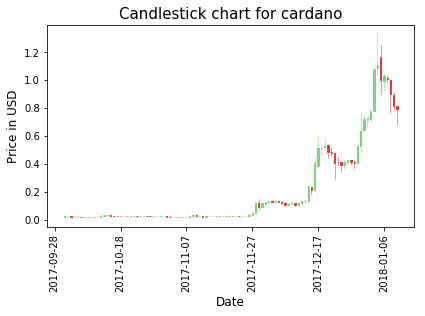

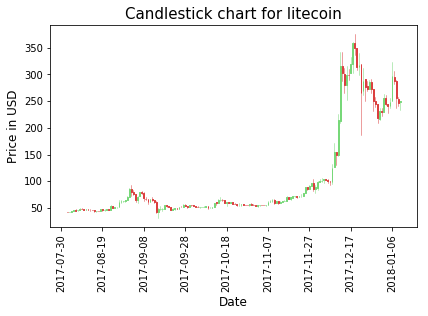

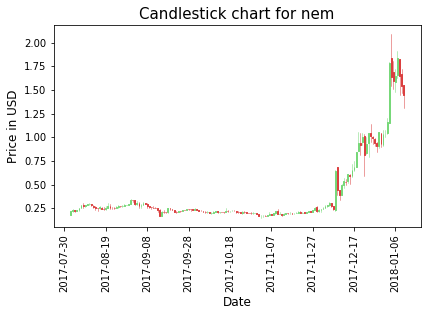

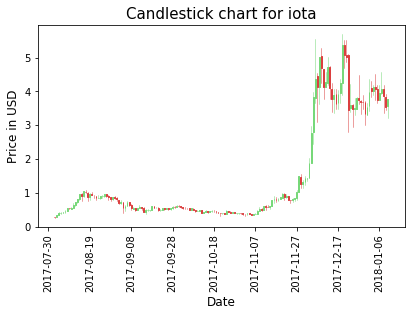

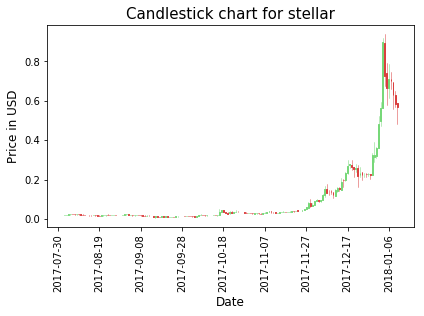

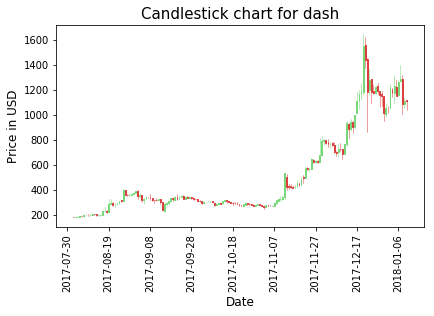

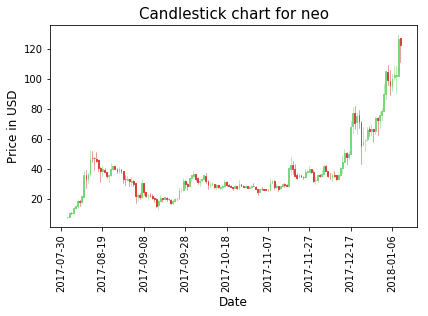

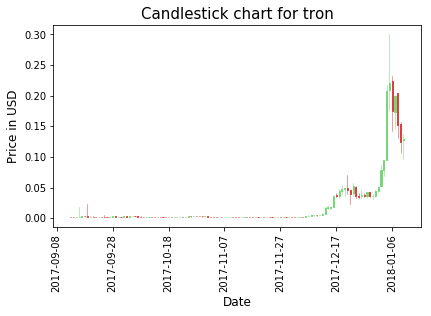

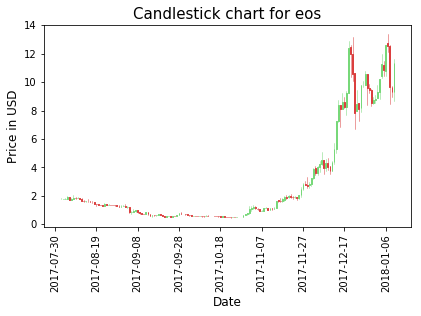

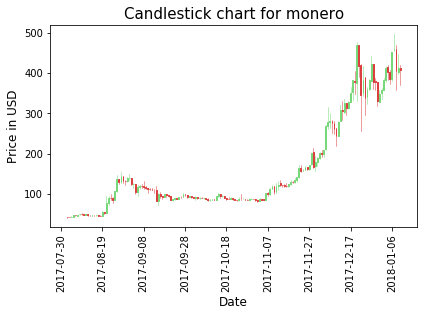

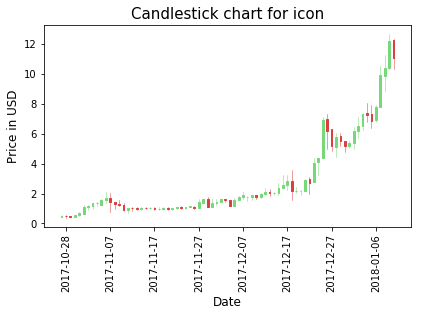

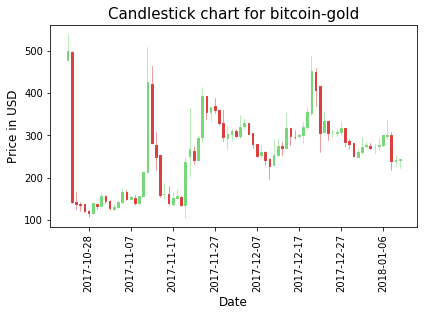

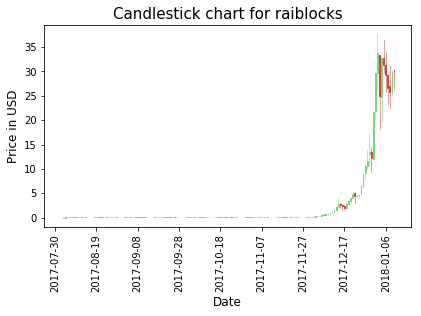

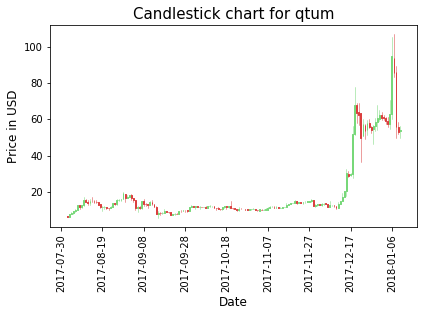

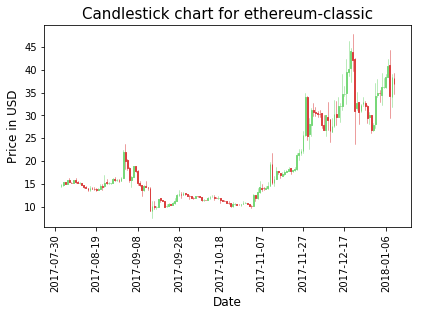

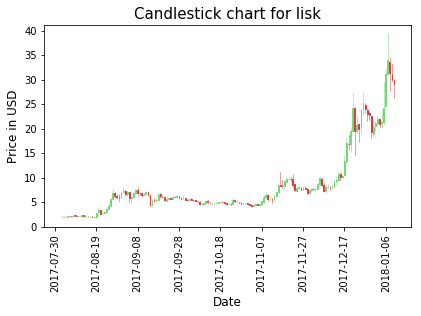

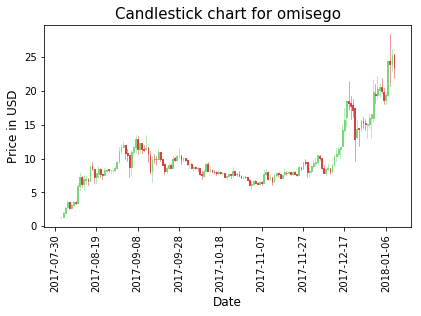

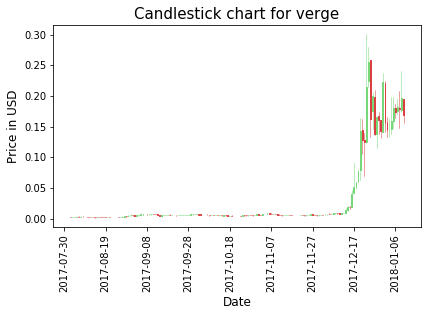

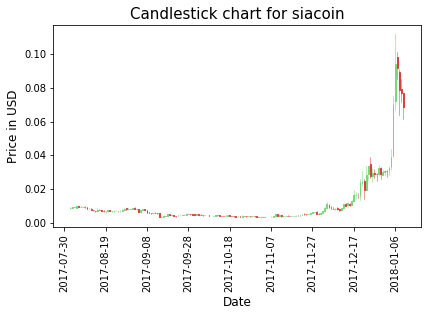

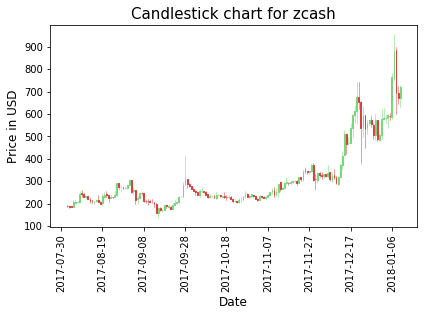

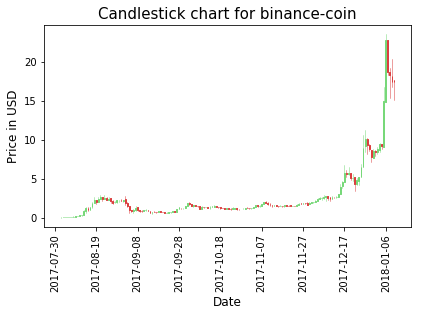

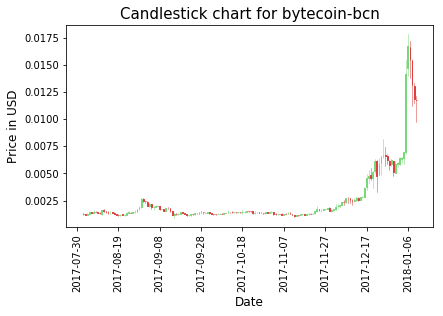

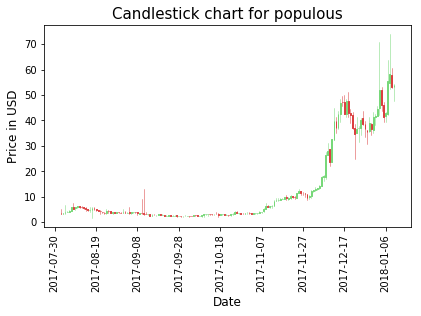

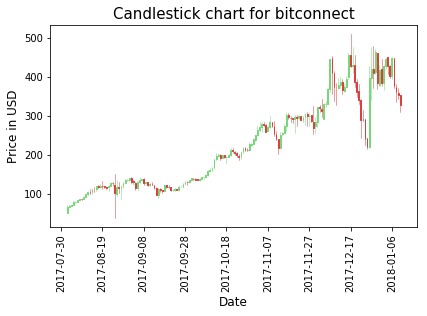

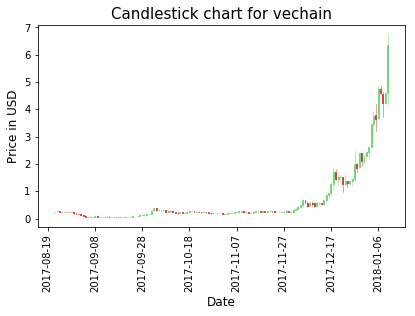

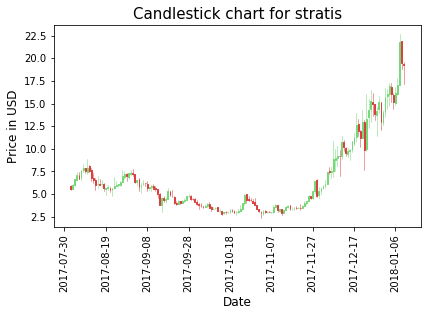

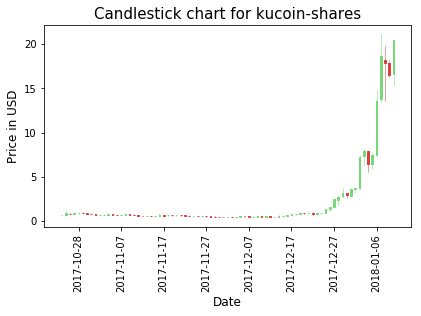

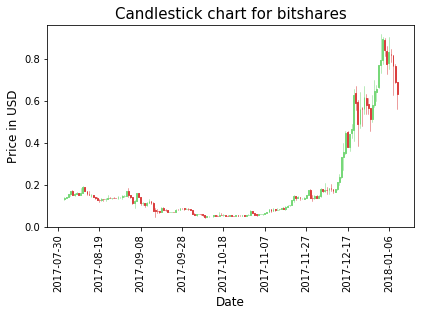

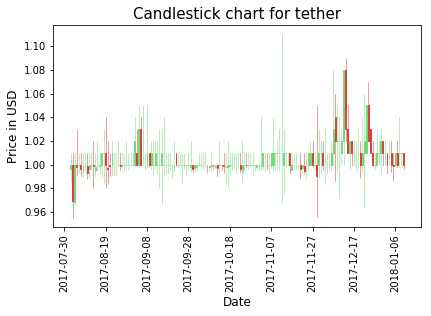

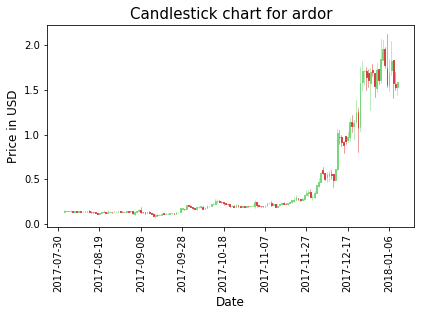

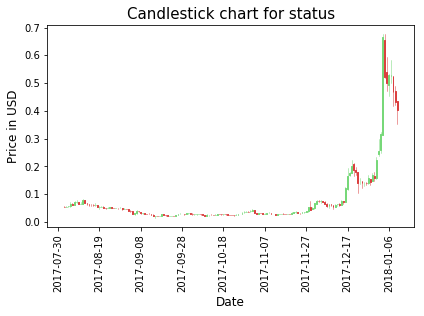

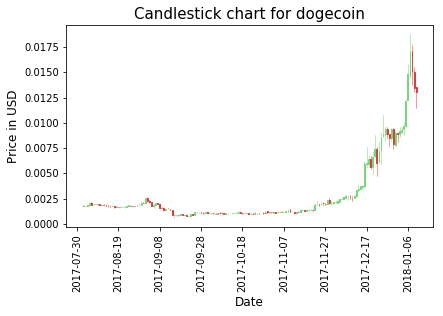

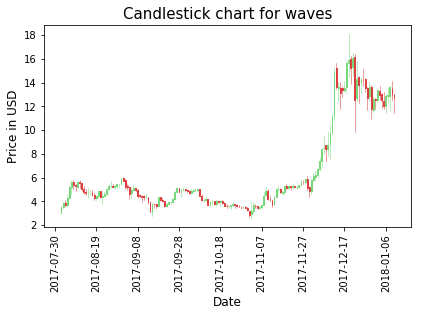

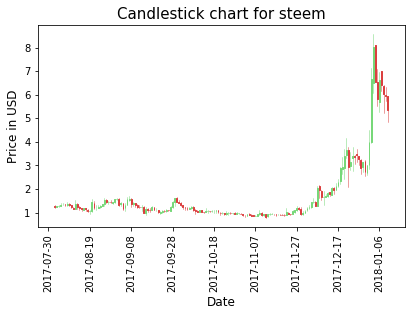

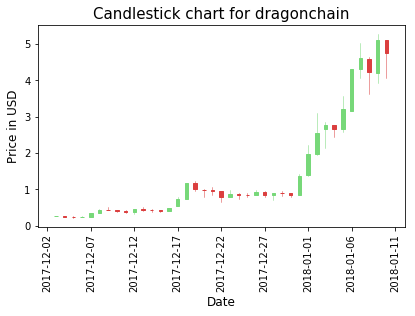

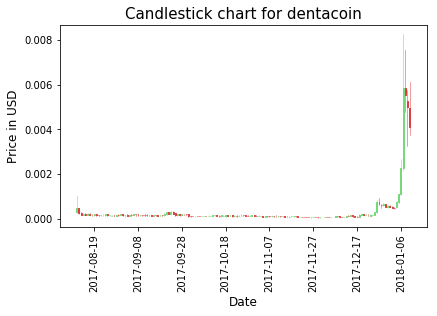

In [8]:
#Now lets look at all the graphs of date to price wrt ohlc relation for all the crypto-currencies
for crypt in cryptos:
    date_to_OHLC_Price_relation(crypt)


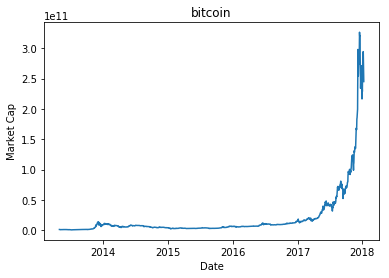

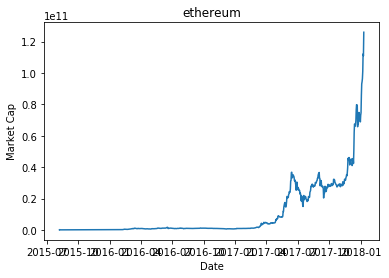

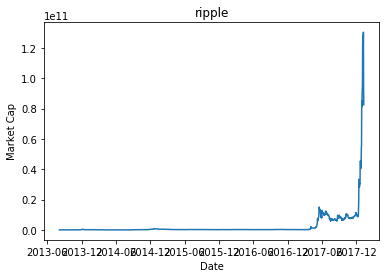

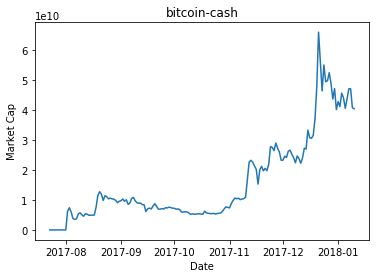

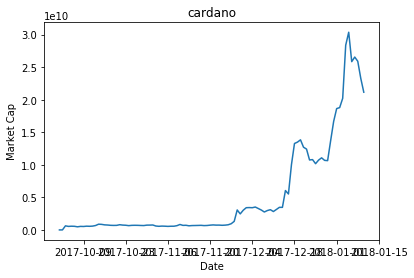

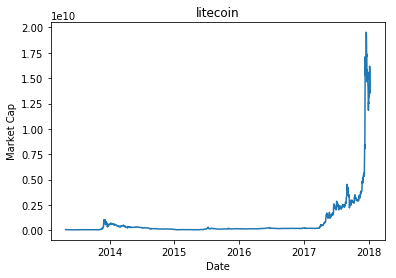

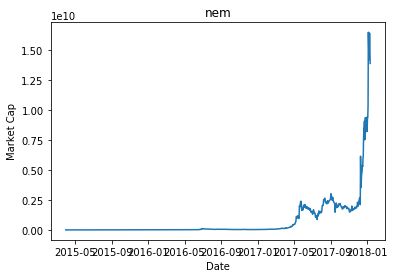

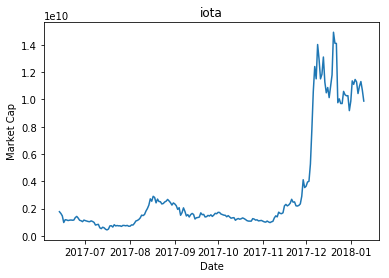

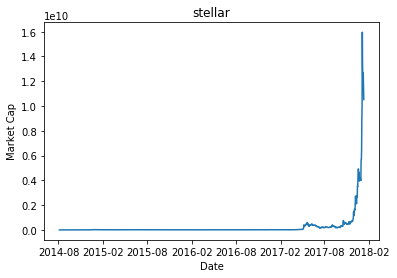

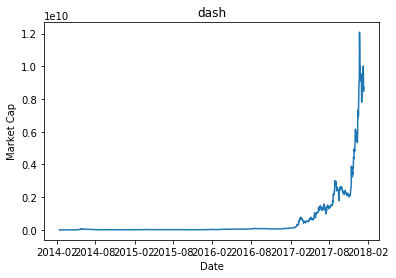

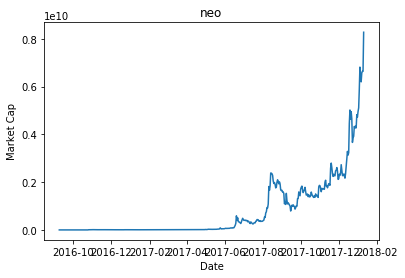

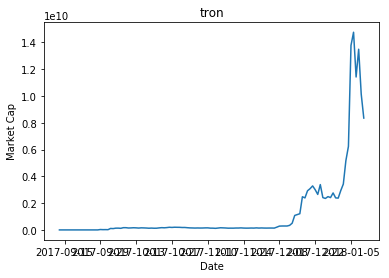

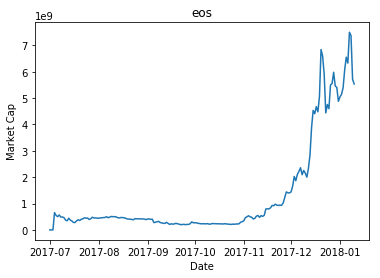

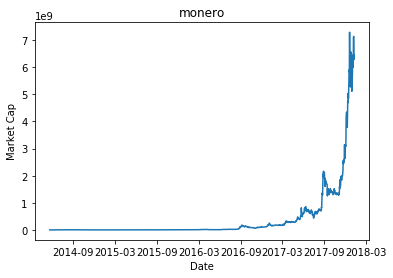

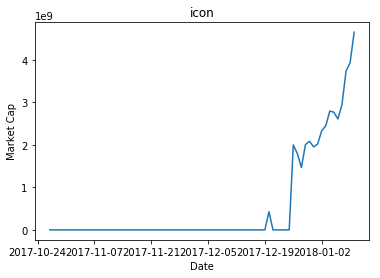

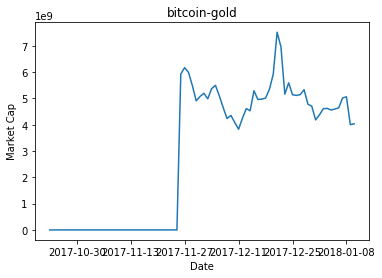

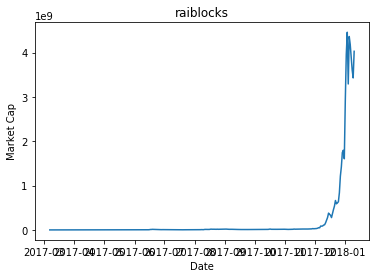

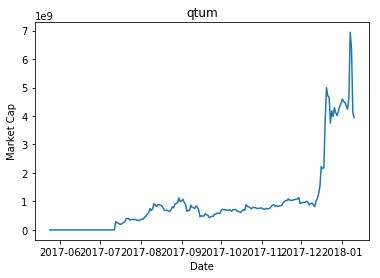

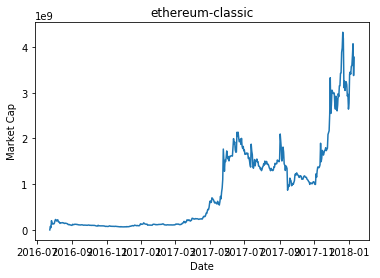

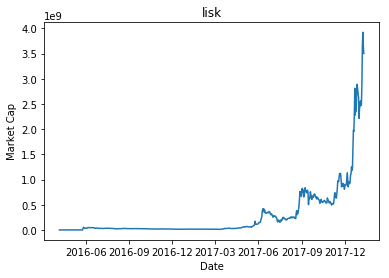

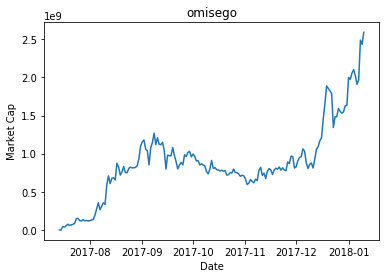

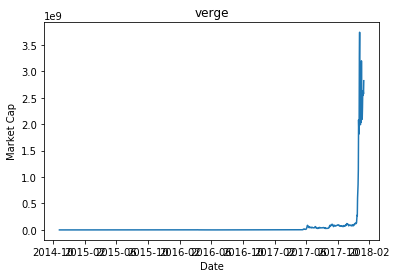

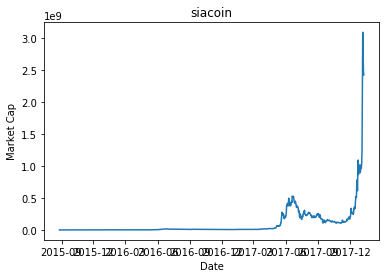

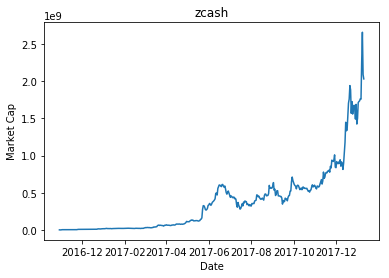

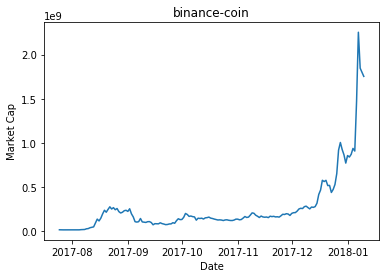

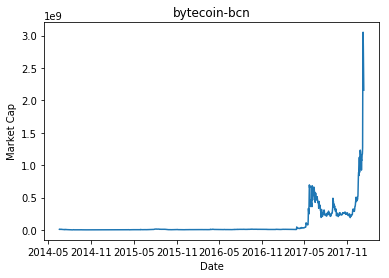

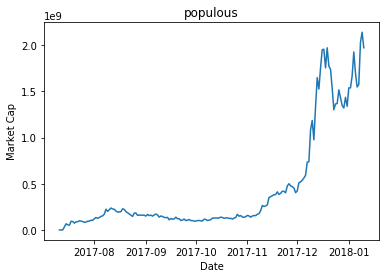

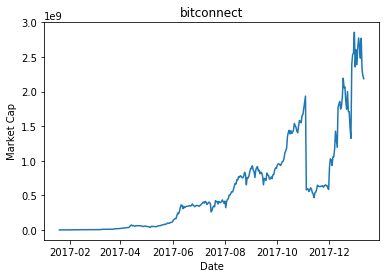

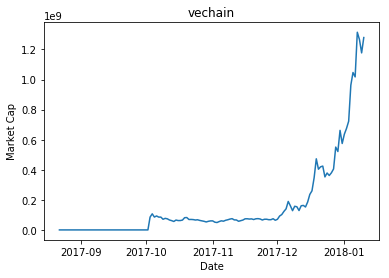

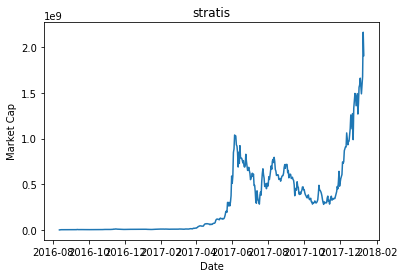

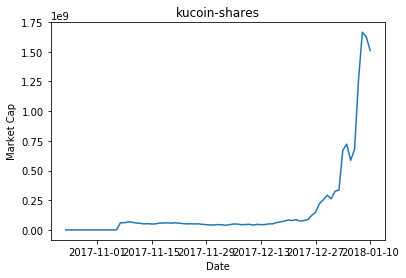

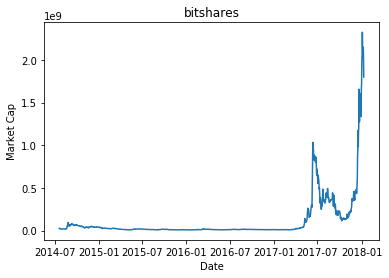

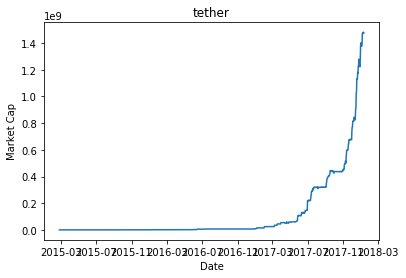

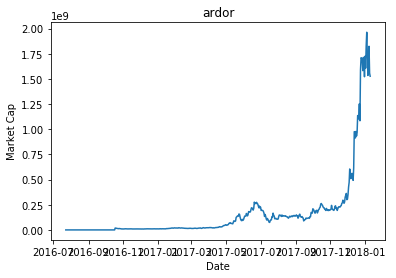

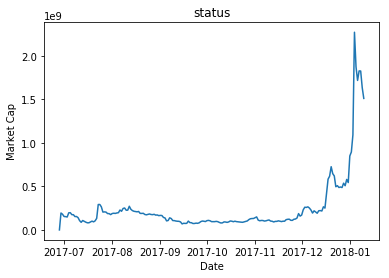

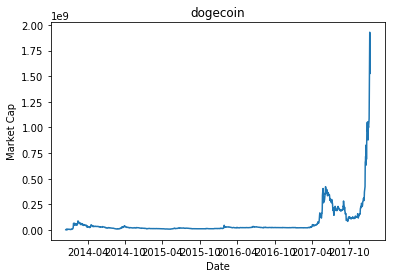

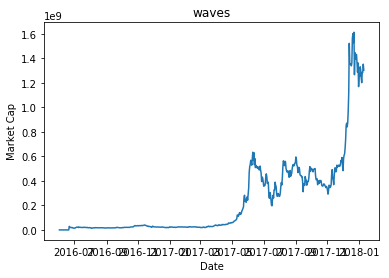

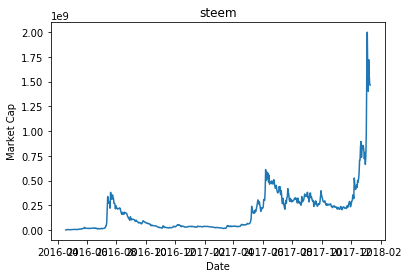

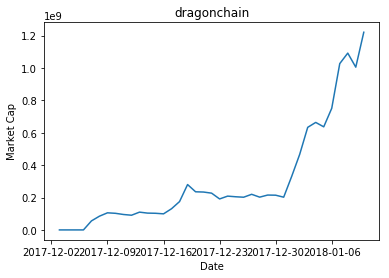

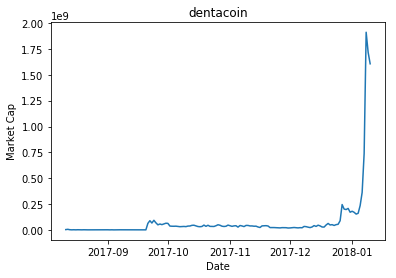

In [9]:
#Now lets look at all the graphs of date to Market Capitalization relation for all the crypto-currencies
for crypt in cryptos:
    date_to_MarketCap_relation(crypt)